<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | Visualizing "real world" data

## Import Useful Libraries

In [1]:
import plotly.graph_objs as go
from ipywidgets import interact
import cufflinks as cf
import plotly.offline as py
import numpy as np
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cf.go_offline()

pd.set_option('display.max_rows', None)

## Pikalytics dataset

### Pikalytics dataset EDA and cleaning

In [2]:
pikalytics = pd.read_csv("data/pikalyticsDF_clean.csv")

In [3]:
pikalytics.shape

(224, 9)

In [4]:
pikalytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 224 non-null    int64  
 1   name                       224 non-null    object 
 2   types                      222 non-null    object 
 3   percent                    222 non-null    float64
 4   ranking                    222 non-null    float64
 5   viability                  224 non-null    object 
 6   Most common teammates      224 non-null    object 
 7   2nd most common teammates  224 non-null    object 
 8   3rd most common teammates  224 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 15.9+ KB


In [5]:
pikalytics = pikalytics.drop(["Unnamed: 0"], axis=1)
pikalytics = pikalytics.rename(columns={"name": "pokemon_name"})
pikalytics.head()

,pokemon_name,types,percent,ranking,viability,Most common teammates,2nd most common teammates,3rd most common teammates
0,Togekiss,"['fairy', 'flying']",46.0,1.0,B,"Excadrill 38.536% ['ground', 'steel']",Arcanine 35.593% ['fire'],"Dragapult 33.117% ['dragon', 'ghost']"
1,Arcanine,['fire'],36.0,2.0,B,"Togekiss 45.687% ['fairy', 'flying']","Dragapult 30.663% ['dragon', 'ghost']","Tyranitar 28.847% ['rock', 'dark']"
2,Dragapult,"['dragon', 'ghost']",31.0,3.0,B,"Togekiss 48.228% ['fairy', 'flying']","Excadrill 38.133% ['ground', 'steel']",Arcanine 34.788% ['fire']
3,Excadrill,"['ground', 'steel']",30.0,4.0,B,"Togekiss 59.572% ['fairy', 'flying']","Tyranitar 47.122% ['rock', 'dark']","Dragapult 40.479% ['dragon', 'ghost']"
4,Whimsicott,"['grass', 'fairy']",29.0,5.0,B-,"Duraludon 36.074% ['steel', 'dragon']","Togekiss 32.431% ['fairy', 'flying']",Arcanine 25.983% ['fire']


In [6]:
pikalytics.tail()

,pokemon_name,types,percent,ranking,viability,Most common teammates,2nd most common teammates,3rd most common teammates
219,Solrock,"['rock', 'psychic']",0.0,220.0,C,Torkoal 75.838% ['fire'],"Obstagoon 68.307% ['dark', 'normal']","Dracozolt 68.292% ['electric', 'dragon']"
220,Cottonee,"['grass', 'fairy']",0.0,221.0,C,"Excadrill 68.691% ['ground', 'steel']",Vanilluxe 51.546% ['ice'],"Togekiss 51.127% ['fairy', 'flying']"
221,Throh,['fighting'],0.0,222.0,C+,"Gyarados 59.921% ['water', 'flying']",Arcanine 59.832% ['fire'],"Whimsicott 59.695% ['grass', 'fairy']"
222,Shellos,['water'],0.0,223.0,C-,"Indeedee-F 95.882% ['psychic', 'normal']","Rhyperior 95.882% ['ground', 'rock']","Hatterene 86.486% ['psychic', 'fairy']"
223,Wobbuffet,['psychic'],0.0,224.0,D+,"Lapras 66.298% ['water', 'ice']",Gothitelle 51.576% ['psychic'],"Gengar 44.001% ['ghost', 'poison']"


In [7]:
pikalytics.describe().T

,count,mean,std,min,25%,50%,75%,max
percent,222.0,2.653153,6.397218,0.0,0.00,0.0,1.00,46.0
ranking,222.0,112.590090,65.057778,1.0,56.25,112.5,168.75,224.0


### Pikalytics dataset visualization

In [8]:
import plotly.express as px

px.bar(pikalytics,
       y="percent",
       x="viability",
       color="pokemon_name",
       hover_name="pokemon_name")

### Pikalytics dataset insights

#### ¿Does viability predict usage?

We don't really know if *viability* predicts *usage*, or if it is the latest that defines which Pokémon deserves to be in which *viability* cluster. However we can see that the 3 most used Pokémon are in cluster B, cluster B- Pokémon are used almost as much frequently, and very few Pokemon within-cluster C+ are used, being 0 Pokémon from lower strata. 

Still, we don't know what are the rules deciding in which stratum Pokémon are classified and... ¿What about A, A-, and B+ clusters? ¿Are they *Uber* (banned)?

## Wikidex dataset

### Wikidex dataset EDA and cleaning

In [9]:
wikidex = pd.read_csv("data/wikidexDF_clean.csv")

In [10]:
wikidex.shape

(1021, 12)

In [11]:
wikidex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1021 non-null   int64 
 1   National Dex #   1021 non-null   int64 
 2   Pokémon          1021 non-null   object
 3   HP               1021 non-null   int64 
 4   Attack           1021 non-null   object
 5   Defense          1021 non-null   object
 6   Special Attack   1021 non-null   object
 7   Special Defense  1021 non-null   object
 8   Speed            1021 non-null   int64 
 9   Mean             1021 non-null   object
 10  SD               1021 non-null   object
 11  Total            1021 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 95.8+ KB


In [12]:
wikidex.head()

,Unnamed: 0,National Dex #,Pokémon,HP,Attack,Defense,Special Attack,Special Defense,Speed,Mean,SD,Total
0,0,1,Bulbasaur,45,49,49,65,65,45,"53,00","8,64",318
1,1,2,Ivysaur,60,62,63,80,80,60,"67,50","8,90",405
2,2,3,Venusaur,80,82,83,100,100,80,"87,50","8,90",525
3,3,3,Mega-Venusaur,80,100,123,122,120,80,"104,17","18,75",625
4,4,4,Charmander,39,52,43,60,50,65,"51,50","9,00",309


In [13]:
wikidex.tail()

,Unnamed: 0,National Dex #,Pokémon,HP,Attack,Defense,Special Attack,Special Defense,Speed,Mean,SD,Total
1016,1016,888,Zacian espada suprema,92,170,115,80,115,148,120,"30,87",720
1017,1017,889,Zamazenta,92,130,115,80,115,138,"111,67","20,17",670
1018,1018,889,Zamazenta escudo supremo,92,130,145,80,145,128,120,"25,16",720
1019,1019,890,Eternatus,140,85,95,145,95,130,"115,00","23,98",690
1020,1020,890,Eternatus Dinamax infinito,255,115,250,125,250,130,"187,50","64,34",1125


In [14]:
wikidex["HP"] = wikidex["HP"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
wikidex["Attack"] = wikidex["Attack"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
wikidex["Defense"] = wikidex["Defense"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
wikidex["Special Attack"] = wikidex["Special Attack"].replace(
    "901", "90").replace("953", "95").replace("404", "40").replace(
        "505", "50").replace("927", "92").replace("959", "95").replace(
            "8510", "85").replace("85 10", "85").replace("7013", "70").replace(
                "9015",
                "90").replace("8618", "86").replace("7019", "70").replace(
                    "6020",
                    "60").replace("8521", "85").replace("6022", "60").replace(
                        "6523", "65").replace("65 23", "65").replace(
                            "7325", "73").replace("9026", "90").replace(
                                "90 26", "90").replace("6527", "65").replace(
                                    "65 27",
                                    "65").replace("8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
wikidex["Special Defense"] = wikidex["Special Defense"].replace(
    "901", "90").replace("953", "95").replace("404", "40").replace(
        "505", "50").replace("927", "92").replace("959", "95").replace(
            "8510", "85").replace("85 10", "85").replace("7013", "70").replace(
                "9015",
                "90").replace("8618", "86").replace("7019", "70").replace(
                    "6020",
                    "60").replace("8521", "85").replace("6022", "60").replace(
                        "6523", "65").replace("65 23", "65").replace(
                            "7325", "73").replace("9026", "90").replace(
                                "90 26", "90").replace("6527", "65").replace(
                                    "65 27",
                                    "65").replace("8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
wikidex["Speed"] = wikidex["Speed"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
                                        ).replace("959", "95").replace(
                                            "9011",
                                            "90"
                                        ).replace(
                                            "7515",
                                            "75"
                                        ).replace(
                                            "8515",
                                            "85"
                                        ).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
                                                    ).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)

In [15]:
wikidex_stats = wikidex.drop(["Unnamed: 0", "Mean", "SD", "Total"], axis=1)

wikidex_new_HP = [re.findall("^.{3}", s) for s in wikidex_stats["HP"]]
wikidex_new_Attack = [re.findall("^.{3}", s) for s in wikidex_stats["Attack"]]
wikidex_new_Defense = [
    re.findall("^.{3}", s) for s in wikidex_stats["Defense"]
]
wikidex_new_Special_Attack = [
    re.findall("^.{3}", s) for s in wikidex_stats["Special Attack"]
]
wikidex_new_Special_Defense = [
    re.findall("^.{3}", s) for s in wikidex_stats["Special Defense"]
]
wikidex_new_Speed = [re.findall("^.{3}", s) for s in wikidex_stats["Speed"]]

In [16]:
wikidex_new_HP = pd.DataFrame(wikidex_new_HP)
wikidex_new_Attack = pd.DataFrame(wikidex_new_Attack)
wikidex_new_Defense = pd.DataFrame(wikidex_new_Defense)
wikidex_new_Special_Attack = pd.DataFrame(wikidex_new_Special_Attack)
wikidex_new_Special_Defense = pd.DataFrame(wikidex_new_Special_Defense)
wikidex_new_Speed = pd.DataFrame(wikidex_new_Speed)

In [17]:
wikidex_new_stats = pd.concat([
    wikidex["Pokémon"], wikidex_new_HP, wikidex_new_Attack,
    wikidex_new_Defense, wikidex_new_Special_Attack,
    wikidex_new_Special_Defense, wikidex_new_Speed
],
                              axis=1)

In [18]:
wikidex_new_stats.columns = [
    "Pokémon", "HP", "Attack", "Defense", "Special Attack", "Special Defense",
    "Speed"
]

In [19]:
wikidex_clean = pd.merge(wikidex,
                         wikidex_new_stats,
                         how="left",
                         left_on=[
                             "Pokémon", "HP", "Attack", "Defense",
                             "Special Attack", "Special Defense", "Speed"
                         ],
                         right_on=[
                             "Pokémon", "HP", "Attack", "Defense",
                             "Special Attack", "Special Defense", "Speed"
                         ])

In [20]:
wikidex_clean["HP"] = wikidex_clean["HP"].astype(float)
wikidex_clean["Attack"] = wikidex_clean["Attack"].astype(float)
wikidex_clean["Defense"] = wikidex_clean["Defense"].astype(float)
wikidex_clean["Special Attack"] = wikidex_clean["Special Attack"].astype(float)
wikidex_clean["Special Defense"] = wikidex_clean["Special Defense"].astype(
    float)
wikidex_clean["Speed"] = wikidex_clean["Speed"].astype(float)
wikidex_clean["Mean"] = wikidex_clean["Mean"].str.replace(',',
                                                          '.').astype(float)
wikidex_clean["SD"] = wikidex_clean["SD"].str.replace(',', '.').astype(float)

In [21]:
errorsDF = wikidex_clean.loc[(wikidex_clean["HP"] > 255) |
                             (wikidex_clean["Attack"] > 255) |
                             (wikidex_clean["Defense"] > 255) |
                             (wikidex_clean["Special Attack"] > 255) |
                             (wikidex_clean["Special Defense"] > 255) |
                             (wikidex_clean["Speed"] > 255)]

In [22]:
wikidex = wikidex_clean.drop([
    22, 34, 45, 58, 65, 84, 97, 112, 131, 267, 272, 320, 338, 355, 399, 400,
    421, 597, 610, 616, 635, 652, 709, 710
],
                             axis=0)

In [23]:
wikidex = wikidex.drop(["Unnamed: 0"], axis=1)
wikidex.describe().T

,count,mean,std,min,25%,50%,75%,max
National Dex #,997.0,439.915747,259.469046,1.00,214.00,437.00,668.00,890.00
HP,997.0,69.536610,26.697959,1.00,50.00,65.00,80.00,255.00
Attack,997.0,80.113340,32.536174,5.00,55.00,76.00,100.00,190.00
Defense,997.0,74.481444,31.573922,5.00,50.00,70.00,90.00,250.00
Special Attack,997.0,72.590772,32.867646,10.00,48.00,65.00,95.00,194.00
Special Defense,997.0,72.018054,28.286963,20.00,50.00,70.00,90.00,250.00
Speed,997.0,67.963892,29.713402,5.00,45.00,65.00,90.00,180.00
Mean,997.0,72.783922,20.508296,29.17,54.67,75.83,85.83,187.50
SD,997.0,19.941545,10.884655,0.00,12.58,18.35,24.73,103.22
Total,997.0,436.704112,123.049349,175.00,328.00,455.00,515.00,1125.00


### Wikidex dataset visualization

In [24]:
stats = wikidex[[
    "National Dex #", "Pokémon", "HP", "Attack", "Defense", "Special Attack",
    "Special Defense", "Speed"
]].copy()

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3,
                    cols=2,
                    subplot_titles=("HP", "Attack", "Defense",
                                    "Special Attack", "Special Defense",
                                    "Speed"))

fig.add_trace(go.Histogram(x=stats["HP"],
                           name="HP",
                           xbins=dict(start=1, end=255, size=5)),
              row=1,
              col=1)

fig.add_trace(go.Histogram(x=stats["Attack"],
                           name="Attack",
                           xbins=dict(start=5, end=190, size=5)),
              row=1,
              col=2)

fig.add_trace(go.Histogram(x=stats["Defense"],
                           name="Defense",
                           xbins=dict(start=5, end=250, size=5)),
              row=2,
              col=1)

fig.add_trace(go.Histogram(x=stats["Special Attack"],
                           name="Special Attack",
                           xbins=dict(start=10, end=194, size=5)),
              row=2,
              col=2)

fig.add_trace(go.Histogram(x=stats["Special Defense"],
                           name="Special Defense",
                           xbins=dict(start=20, end=250, size=5)),
              row=3,
              col=1)

fig.add_trace(go.Histogram(x=stats["Speed"],
                           name="Speed",
                           xbins=dict(start=5, end=180, size=5)),
              row=3,
              col=2)

fig.update_layout(height=1000,
                  width=1000,
                  title_text="Base stats distribution")

fig.show()

### Wikidex dataset insights

#### Comment about Base Stats distribution through the whole list of Pokémon.

`Shape:`
All the distributions are right-skewed, slightly in *Attack* and *Speed* instances, which are closer to a normal distribution; but none is Wald distributed as they had no support on (0,∞). 

`Centre:`
The stat with the highest mean is *Attack* (80.11) whilst the lowest is *Speed* (67.96) being all-together with *HP* (69.53) the only stats with below overall stats mean (72.78) means.

`Spread:`
The stat that holds the biggest spread is *HP* (1-255) whereas *Speed* (5-180) has the lowest range of values.

`Kurtosis:`
Defensive stats (*HP, Defense and Special Defense*) seem to be more Leptokurtic, especially *HP*. On the other hand, offensive-related base stats are more Mesokurtic, being *Speed* the best example.


## Combined dataset

### Combined dataset EDA and cleaning

In [26]:
combined = pd.read_csv("data/Combined_DF_clean.csv")

In [27]:
combined.shape

(197, 18)

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  197 non-null    int64  
 1   National Dex #              197 non-null    int64  
 2   Pokémon                     197 non-null    object 
 3   Type                        197 non-null    object 
 4   Base HP                     197 non-null    float64
 5   Base Attack                 197 non-null    float64
 6   Base Defense                197 non-null    float64
 7   Base Special Attack         197 non-null    float64
 8   Base Special Defense        197 non-null    float64
 9   Base Speed                  197 non-null    float64
 10  Base Stats Mean             197 non-null    float64
 11  Base Stats SD               197 non-null    float64
 12  VGC 2020 Usage Rank         196 non-null    float64
 13  VGC 2020 Usage %            196 non

In [29]:
combined.head()

,Unnamed: 0,National Dex #,Pokémon,Type,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Base Stats Mean,Base Stats SD,VGC 2020 Usage Rank,VGC 2020 Usage %,Competitive viability,Most frequent teammate,2nd most frequent teammate,3rd most frequent teammate
0,0,468,Togekiss,"['fairy', 'flying']",85.0,50.0,95.0,120.0,115.0,80.0,90.83,23.35,1.0,46.0,B,"Excadrill 38.536% ['ground', 'steel']",Arcanine 35.593% ['fire'],"Dragapult 33.117% ['dragon', 'ghost']"
1,1,59,Arcanine,['fire'],90.0,110.0,80.0,100.0,80.0,95.0,92.50,10.70,2.0,36.0,B,"Togekiss 45.687% ['fairy', 'flying']","Dragapult 30.663% ['dragon', 'ghost']","Tyranitar 28.847% ['rock', 'dark']"
2,2,887,Dragapult,"['dragon', 'ghost']",88.0,120.0,75.0,100.0,75.0,142.0,100.00,24.35,3.0,31.0,B,"Togekiss 48.228% ['fairy', 'flying']","Excadrill 38.133% ['ground', 'steel']",Arcanine 34.788% ['fire']
3,3,530,Excadrill,"['ground', 'steel']",110.0,135.0,60.0,50.0,65.0,88.0,84.67,29.95,4.0,30.0,B,"Togekiss 59.572% ['fairy', 'flying']","Tyranitar 47.122% ['rock', 'dark']","Dragapult 40.479% ['dragon', 'ghost']"
4,4,547,Whimsicott,"['grass', 'fairy']",60.0,67.0,85.0,77.0,75.0,116.0,80.00,17.91,5.0,29.0,B-,"Duraludon 36.074% ['steel', 'dragon']","Togekiss 32.431% ['fairy', 'flying']",Arcanine 25.983% ['fire']


In [30]:
combined.tail()

,Unnamed: 0,National Dex #,Pokémon,Type,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Base Stats Mean,Base Stats SD,VGC 2020 Usage Rank,VGC 2020 Usage %,Competitive viability,Most frequent teammate,2nd most frequent teammate,3rd most frequent teammate
192,192,338,Solrock,"['rock', 'psychic']",9026.0,95.0,85.0,55.0,65.0,70.0,76.67,14.34,220.0,0.0,C,Torkoal 75.838% ['fire'],"Obstagoon 68.307% ['dark', 'normal']","Dracozolt 68.292% ['electric', 'dragon']"
193,193,546,Cottonee,"['grass', 'fairy']",40.0,27.0,60.0,37.0,50.0,66.0,46.67,13.46,221.0,0.0,C,"Excadrill 68.691% ['ground', 'steel']",Vanilluxe 51.546% ['ice'],"Togekiss 51.127% ['fairy', 'flying']"
194,194,538,Throh,['fighting'],120.0,100.0,85.0,30.0,85.0,45.0,77.50,30.92,222.0,0.0,C+,"Gyarados 59.921% ['water', 'flying']",Arcanine 59.832% ['fire'],"Whimsicott 59.695% ['grass', 'fairy']"
195,195,422,Shellos,['water'],76.0,48.0,48.0,57.0,62.0,34.0,54.17,13.09,223.0,0.0,C-,"Indeedee-F 95.882% ['psychic', 'normal']","Rhyperior 95.882% ['ground', 'rock']","Hatterene 86.486% ['psychic', 'fairy']"
196,196,202,Wobbuffet,['psychic'],190.0,33.0,58.0,33.0,58.0,33.0,67.50,55.91,224.0,0.0,D+,"Lapras 66.298% ['water', 'ice']",Gothitelle 51.576% ['psychic'],"Gengar 44.001% ['ghost', 'poison']"


In [31]:
combined["Base HP"] = combined["Base HP"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
combined["Base Attack"] = combined["Base Attack"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
combined["Base Defense"] = combined["Base Defense"].replace(
    "901", "90").replace("953", "95").replace("404", "40").replace(
        "505", "50").replace("927", "92").replace("959", "95").replace(
            "8510", "85").replace("85 10", "85").replace("7013", "70").replace(
                "9015",
                "90").replace("8618", "86").replace("7019", "70").replace(
                    "6020",
                    "60").replace("8521", "85").replace("6022", "60").replace(
                        "6523", "65").replace("65 23", "65").replace(
                            "7325", "73").replace("9026", "90").replace(
                                "90 26", "90").replace("6527", "65").replace(
                                    "65 27",
                                    "65").replace("8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
combined["Base Special Attack"] = combined["Base Special Attack"].replace(
    "901", "90").replace("953", "95").replace("404", "40").replace(
        "505", "50").replace("927", "92").replace("959", "95").replace(
            "8510", "85").replace("85 10", "85").replace("7013", "70").replace(
                "9015",
                "90").replace("8618", "86").replace("7019", "70").replace(
                    "6020",
                    "60").replace("8521", "85").replace("6022", "60").replace(
                        "6523", "65").replace("65 23", "65").replace(
                            "7325", "73").replace("9026", "90").replace(
                                "90 26", "90").replace("6527", "65").replace(
                                    "65 27",
                                    "65").replace("8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
combined["Base Special Defense"] = combined["Base Special Defense"].replace(
    "901", "90").replace("953", "95").replace("404", "40").replace(
        "505", "50").replace("927", "92").replace("959", "95").replace(
            "8510", "85").replace("85 10", "85").replace("7013", "70").replace(
                "9015",
                "90").replace("8618", "86").replace("7019", "70").replace(
                    "6020",
                    "60").replace("8521", "85").replace("6022", "60").replace(
                        "6523", "65").replace("65 23", "65").replace(
                            "7325", "73").replace("9026", "90").replace(
                                "90 26", "90").replace("6527", "65").replace(
                                    "65 27",
                                    "65").replace("8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)
combined["Base Speed"] = combined["Base Speed"].replace("901", "90").replace(
    "953", "95").replace("404", "40").replace("505", "50").replace(
        "927", "92").replace("959", "95").replace("8510", "85").replace(
            "85 10", "85").replace("7013", "70").replace("9015", "90").replace(
                "8618",
                "86").replace("7019", "70").replace("6020", "60").replace(
                    "8521",
                    "85").replace("6022", "60").replace("6523", "65").replace(
                        "65 23", "65").replace("7325", "73").replace(
                            "9026", "90").replace("90 26", "90").replace(
                                "6527", "65").replace("65 27", "65").replace(
                                    "8030", "80").replace(
                                        "9531", "95").replace(
                                            "5034", "50"
).replace("959", "95").replace(
                                            "9011",
                                            "90"
).replace(
                                            "7515",
                                            "75"
).replace(
                                            "8515",
                                            "85"
).replace("85 15", "85").replace(
                                            "8019",
                                            "80").replace(
                                                "7522",
                                                "75").replace(
                                                    "7523",
                                                    "75").replace(
                                                        "8026",
                                                        "80"
).replace(
                                                        "140 35",
                                                        "140").replace(
                                                            " ", "").replace(
                                                                ",",
                                                                ".").astype(
                                                                    str)

In [32]:
combined_stats = combined.drop(
    ["Unnamed: 0", "Base Stats Mean", "Base Stats SD"], axis=1)

combined_new_HP = [re.findall("^.{3}", s) for s in combined_stats["Base HP"]]
combined_new_Attack = [
    re.findall("^.{3}", s) for s in combined_stats["Base Attack"]
]
combined_new_Defense = [
    re.findall("^.{3}", s) for s in combined_stats["Base Defense"]
]
combined_new_Special_Attack = [
    re.findall("^.{3}", s) for s in combined_stats["Base Special Attack"]
]
combined_new_Special_Defense = [
    re.findall("^.{3}", s) for s in combined_stats["Base Special Defense"]
]
combined_new_Speed = [
    re.findall("^.{3}", s) for s in combined_stats["Base Speed"]
]

In [33]:
combined_new_HP = pd.DataFrame(combined_new_HP)
combined_new_Attack = pd.DataFrame(combined_new_Attack)
combined_new_Defense = pd.DataFrame(combined_new_Defense)
combined_new_Special_Attack = pd.DataFrame(combined_new_Special_Attack)
combined_new_Special_Defense = pd.DataFrame(combined_new_Special_Defense)
combined_new_Speed = pd.DataFrame(combined_new_Speed)

In [34]:
combined_new_stats = pd.concat([
    combined["Pokémon"], combined_new_HP, combined_new_Attack,
    combined_new_Defense, combined_new_Special_Attack,
    combined_new_Special_Defense, combined_new_Speed
],
    axis=1)

In [35]:
combined_new_stats.columns = [
    "Pokémon", "Base HP", "Base Attack", "Base Defense", "Base Special Attack",
    "Base Special Defense", "Base Speed"
]

In [36]:
combined_clean = pd.merge(combined,
                          combined_new_stats,
                          how="left",
                          left_on=[
                              "Pokémon", "Base HP", "Base Attack",
                              "Base Defense", "Base Special Attack",
                              "Base Special Defense", "Base Speed"
                          ],
                          right_on=[
                              "Pokémon", "Base HP", "Base Attack",
                              "Base Defense", "Base Special Attack",
                              "Base Special Defense", "Base Speed"
                          ])

In [37]:
combined_clean["Base HP"] = combined_clean["Base HP"].astype(float)
combined_clean["Base Attack"] = combined_clean["Base Attack"].astype(float)
combined_clean["Base Defense"] = combined_clean["Base Defense"].astype(float)
combined_clean["Base Special Attack"] = combined_clean[
    "Base Special Attack"].astype(float)
combined_clean["Base Special Defense"] = combined_clean[
    "Base Special Defense"].astype(float)
combined_clean["Base Speed"] = combined_clean["Base Speed"].astype(float)

In [38]:
errorsCombined = combined_clean.loc[
    (combined_clean["Base HP"] > 255) | (combined_clean["Base Attack"] > 255) |
    (combined_clean["Base Defense"] > 255) |
    (combined_clean["Base Special Attack"] > 255) |
    (combined_clean["Base Special Defense"] > 255) |
    (combined_clean["Base Speed"] > 255)]

Aceptaremos realizar un drop con los datos que siguen estando erroneos dado que todos tienen un usage inferior al 5%

In [39]:
combined = combined_clean.drop(
    [33, 38, 44, 48, 52, 73, 74, 80, 89, 109, 122, 149, 153, 188, 191, 192],
    axis=0)

In [40]:
combined = combined.drop(["Unnamed: 0"], axis=1)
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
National Dex #,181.0,556.149171,257.181075,6.00,344.00,596.00,778.00,887.00
Base HP,181.0,77.745856,25.287273,1.00,60.00,72.00,90.00,190.00
Base Attack,181.0,87.723757,27.674716,10.00,65.00,90.00,110.00,147.00
Base Defense,181.0,86.292818,29.744979,40.00,65.00,80.00,100.00,230.00
Base Special Attack,181.0,77.723757,27.584032,10.00,57.00,77.00,95.00,145.00
Base Special Defense,181.0,83.220994,25.591574,20.00,65.00,80.00,95.00,230.00
Base Speed,181.0,68.215470,29.785772,5.00,42.00,67.00,88.00,145.00
Base Stats Mean,181.0,80.153867,9.819484,39.33,77.67,81.67,85.00,100.00
Base Stats SD,181.0,24.015746,11.511506,0.00,16.75,23.33,28.82,103.22
VGC 2020 Usage Rank,180.0,109.838889,64.332079,1.00,55.50,110.50,161.50,224.00


### Combined dataset visualization

In [41]:
import plotly.express as px

px.scatter(combined,
           x="VGC 2020 Usage %",
           y="Base Stats Mean",
           color="Pokémon",
           hover_name="Pokémon")

### Combined dataset insights

#### Comments about VGC 2020 Usage % and Base Stats Mean relationship

Pokémon's usage in VGC 2020 online competitions seems to be ***positively correlated*** with each Pokémon's Base Stats Mean forming a ***logarithmic growth*** so that Stats Means grow a lot without affecting much to VGC Usage %, and from 70 base stats means, usage starts increasing really fast, and it almost stops growing from 85-90 mean values.

## Outliers dataset

### Outliers dataset  EDA and cleaning

In [42]:
outliers = pd.read_csv("data/outliers_clean.csv")

In [43]:
outliers.shape

(18, 13)

In [44]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18 non-null     int64  
 1   Outlier               18 non-null     object 
 2   Pokémon               18 non-null     object 
 3   Type                  18 non-null     object 
 4   Base Attack           18 non-null     float64
 5   Base Defense          18 non-null     float64
 6   Base HP               18 non-null     float64
 7   Base Special Attack   18 non-null     float64
 8   Base Special Defense  18 non-null     float64
 9   Base Speed            18 non-null     float64
 10  Base Stats Mean       18 non-null     float64
 11  Base Stats SD         18 non-null     float64
 12  VGC 2020 Usage %      18 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.0+ KB


In [45]:
order = [
    'Unnamed: 0', 'Outlier', 'Pokémon', 'Type', 'Base HP', 'Base Attack',
    'Base Defense', 'Base Special Attack', 'Base Special Defense',
    'Base Speed', 'Base Stats Mean', 'Base Stats SD', 'VGC 2020 Usage %'
]

outliers = outliers[order]

In [46]:
outliers.head()

,Unnamed: 0,Outlier,Pokémon,Type,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Base Stats Mean,Base Stats SD,VGC 2020 Usage %
0,175,Base HP,Shedinja,"['bug', 'ghost']",1.0,90.0,45.0,30.0,30.0,40.0,39.33,26.59,0.0
1,101,Base Special Defense,Stonjourner,['rock'],100.0,125.0,135.0,20.0,20.0,70.0,78.33,46.07,0.0
2,33,Base Stats Mean,Butterfree,"['bug', 'flying']",60.0,45.0,50.0,901.0,80.0,70.0,65.83,15.92,5.0
3,45,Base Stats Mean,Sableye,"['dark', 'ghost']",50.0,75.0,75.0,65.0,65.0,50.0,63.33,10.27,2.0
4,52,Base Stats Mean,Pikachu,['electric'],35.0,55.0,404.0,50.0,505.0,90.0,53.33,17.72,1.0


In [47]:
outliers.tail()

,Unnamed: 0,Outlier,Pokémon,Type,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Base Stats Mean,Base Stats SD,VGC 2020 Usage %
13,186,Base Stats Mean,Mime Jr.,"['psychic', 'fairy']",20.0,25.0,45.0,70.0,90.0,60.0,51.67,24.61,0.0
14,187,Base Stats Mean,Morelull,"['grass', 'fairy']",40.0,35.0,55.0,65.0,75.0,15.0,47.50,19.95,0.0
15,189,Base Stats Mean,Mawile,"['steel', 'fairy']",50.0,85.0,85.0,55.0,55.0,50.0,63.33,15.46,0.0
16,193,Base Stats Mean,Cottonee,"['grass', 'fairy']",40.0,27.0,60.0,37.0,50.0,66.0,46.67,13.46,0.0
17,195,Base Stats Mean,Shellos,['water'],76.0,48.0,48.0,57.0,62.0,34.0,54.17,13.09,0.0


In [48]:
outliers = outliers.drop(["Unnamed: 0"], axis=1)

In [49]:
errorsOutliers = outliers.loc[(outliers["Base HP"] > 255) |
                              (outliers["Base Attack"] > 255) |
                              (outliers["Base Defense"] > 255) |
                              (outliers["Base Special Attack"] > 255) |
                              (outliers["Base Special Defense"] > 255) |
                              (outliers["Base Speed"] > 255)]

De nuevo aceptaremos realizar un drop con los datos que siguen estando erroneos dado que todos tienen un usage inferior al 5%

In [50]:
outliers = outliers.drop([2, 4], axis=0)

In [51]:
outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Base HP,16.0,46.937500,25.373132,1.00,40.0000,49.000,60.0000,100.00
Base Attack,16.0,60.187500,27.479007,25.00,42.5000,51.500,77.5000,125.00
Base Defense,16.0,62.125000,24.165747,40.00,45.0000,51.500,71.2500,135.00
Base Special Attack,16.0,52.937500,18.364708,20.00,36.5000,56.000,65.0000,85.00
Base Special Defense,16.0,57.812500,21.827257,20.00,43.7500,58.500,75.0000,90.00
Base Speed,16.0,48.000000,16.024980,15.00,38.7500,49.000,60.0000,75.00
Base Stats Mean,16.0,54.665625,10.438356,39.33,47.5000,54.000,63.3300,78.33
Base Stats SD,16.0,17.619375,10.241364,0.00,12.6675,13.715,22.6975,46.07
VGC 2020 Usage %,16.0,0.125000,0.500000,0.00,0.0000,0.000,0.0000,2.00


### Outliers dataset visualization

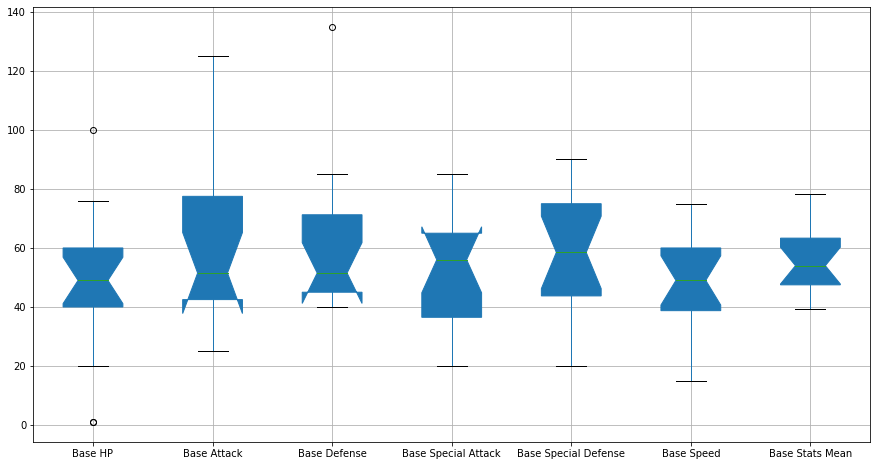

In [52]:
boxplot = outliers.boxplot(column=[
    "Base HP", "Base Attack", "Base Defense", "Base Special Attack",
    "Base Special Defense", "Base Speed", "Base Stats Mean"
],
    figsize=(15, 8),
    notch=True,
    vert=True,
    patch_artist=True)

### Outliers dataset insights

#### Comment about Base Stats distribution of Pokémon very rarely used in VGC 2020
`Centre:`
The stat with the highest mean is *Defense* (62.13) whilst the lowest is *HP* (46.94) being all-together with *Speed* (48) being below average (54.67) as *Special Attack* (52.94).

`Spread:`
The stat that holds the biggest spread is *Defense* (24-135) whereas *Speed* (16-75) has again the lowest range of values.

`Outliers:`
Among all outliers, there's just 2 that are not in this dataset because of having much lower Base Stats Mean that the other competitive Pokémon: Shedinja and Stonjourner. The first one is here because of its negligible HP (1), the latest because of holding the lowest Base Special Defense among Pokémon frequently used in VGC.

Actually, all those data come from those Pokémon that are outliers among VGC 2020 used Pokémon, still there 2 outliers among them. 

One of them is Shedinja which can be considered an outlier among outliers because of its HP (being 1). The other one is Stonjourner, outlying because of both its high HP (100) and its high defence (135).